In [ ]:
# https://www.gapminder.org/data/ -> life expectancy -> lex.csv

In [2]:
import math
import pandas as pd
from scipy.stats import norm

In [9]:
df = pd.read_csv("lex.csv", index_col=0)
# df.head()
# df.shape
# df.columns

<Axes: >

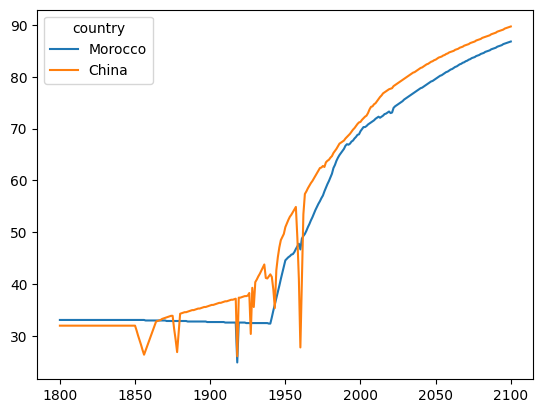

In [18]:
df["2025"]
df[["1925", "2025"]]
df.loc["Morocco"]
df.loc[["Morocco", "China"]]
df.loc[["Morocco", "China"]].transpose().plot()

<Axes: >

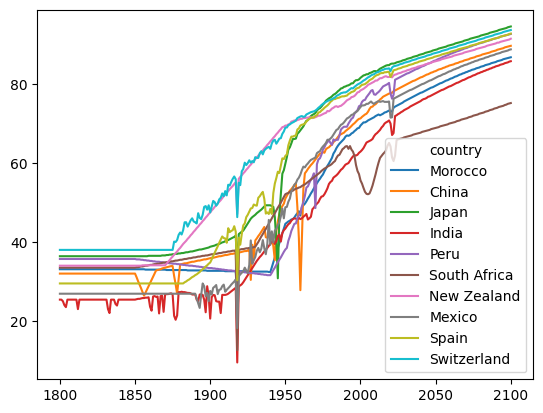

In [20]:
sample = df.loc[["Morocco", "China", "Japan", "India", "Peru",
                 "South Africa", "New Zealand", "Mexico", "Spain",
                 "Switzerland"]]
sample.transpose().plot()

In [23]:
sample_mean = sample["2025"].mean()
sample_std  = sample["2025"].std()

sample_mean.round(1), sample_std.round(1)

(np.float64(78.7), np.float64(6.3))

In [24]:
dist = norm(loc=0.0, scale=1.0)

In [44]:
z = dist.ppf(0.95)

In [45]:
interval = z * sample_std / math.sqrt(10)
interval

np.float64(3.2710170550951356)

In [46]:
print(f"""the estimate for the average life expectancy on earth is
{sample_mean:6.1f} years plus/minus {interval:6.1f} years in 2025
with 90% confidence

(between {sample_mean - interval:6.1f} and {sample_mean + interval:6.1f}
""")

the estimate for the average life expectancy on earth is
  78.7 years plus/minus    3.3 years in 2025
with 90% confidence

(between   75.5 and   82.0



## Caveats:

1. If you assume that the underlying data (population) is normally distributed -> EASY: proceed as above
2. If n > 30  -> EASY, proceed as above (because of the CLT)
3. If n <= 30 -> MEDIUM, but use the t-distribution instead
4. in all other cases -> HARD, ask some else and/or read a book